In [1]:
from google.colab import drive
drive.mount('/content/drive')

ModuleNotFoundError: No module named 'google'

In [3]:
import os
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

path = ''
if os.path.isdir('/content/drive/My Drive/Colab Notebooks/CSE474HW2/data/fashion'):#on ghoogle drive
     path = '/content/drive/My Drive/Colab Notebooks/CSE474HW2/data/fashion'
elif os.path.isdir('C:/Users/Jialang/Google Drive/Colab Notebooks/CSE474HW2/data/fashion'): #on local
     path ='C:/Users/Jialang/Google Drive/Colab Notebooks/CSE474HW2/data/fashion'
elif os.path.isdir('C:/Users/JiaLang\' Desktop/Google Drive/Colab Notebooks/CSE474HW2/data (1)/fashion'):
     path = 'C:/Users/JiaLang\' Desktop/Google Drive/Colab Notebooks/CSE474HW2/data (1)/fashion'
    
    
print(path)

C:/Users/Jialang/Google Drive/Colab Notebooks/CSE474HW2/data/fashion


In [4]:
# Read Fashion MNIST dataset

import sys

import util_mnist_reader
print(path)
X_train, y_train = util_mnist_reader.load_mnist(path, kind='train')
X_test, y_test = util_mnist_reader.load_mnist(path, kind='t10k')

# Your code goes here . . .

C:/Users/Jialang/Google Drive/Colab Notebooks/CSE474HW2/data/fashion


(60000, 784) (10000, 784)
(60000,) (10000,)
60000 10000


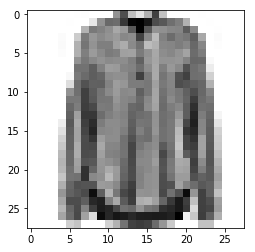

In [5]:
from skimage.util import img_as_float
print(X_train.shape,X_test.shape)
print(y_train.shape,y_test.shape)
print(len(y_train),len(y_test))
plt.imshow(X_train[480].reshape(28,28),cmap='binary')


In [6]:
#sigmoid function
def sigmoid(z):
        return 1/(1+np.exp(-z))

#softmax function 
def softmax(z):
    max_z = np.max(z,axis=0,keepdims=True)
    exp_z = np.exp(z-max_z)
    return_z = exp_z/np.sum(exp_z,axis = 0,keepdims = True)
    return return_z
#activation function: ReLU
def ReLU(x):
    return np.maximum(0,x)

#function to compute the loss for the one hiiden layer model
def compute_multiclass_loss(Y, Y_hat):

    L_sum = np.sum(np.multiply(Y, np.log(Y_hat)))
    m = Y.shape[1]
    L = -(1/m) * L_sum

    return L

# to compute the accuracy after the predicted the data
def compareAccurcy(y_test,y_pred):
    accuracy =0
    for i in range(len(y_test)):
        if y_test[i] == y_pred[i]:
            accuracy +=1
    
    return accuracy/len(y_test)

#to predict after trainind
def predict_new(W1,W2,b1,b2,X):
    Z1 = np.matmul(W1,X) + b1
    A1 = sigmoid(Z1)
    Z2 = np.matmul(W2,A1) + b2
    A2 = softmax(Z2)#np.exp(Z2) / np.sum(np.exp(Z2), axis=0)
    return A2

In [5]:
#show the train accaucy and validation accurcay vs number of epochs, train loss and validation loss vs number of epochs 
def plotGraph(train_losstrack,valid_losstrack,train_acc,valid_acc,learning_rate,hidden_units):
        epochs = range(len(train_losstrack))
        plt.figure(figsize=(15,5))
        
        
        plt.subplot(1,2,1)
        plt.plot(epochs, train_acc, 'green', label='Training accuracy')
        plt.plot(epochs, valid_acc, 'red', label='Validation accuracy')
        plt.xlabel('Number of epochs')
        plt.title("Training and validation accuracy at learning rate: %.3f, hidden units:%d"%(learning_rate,hidden_units))
        plt.legend()
        #plt.figure()
        
        plt.subplot(2,2,2)
        plt.plot(epochs, train_losstrack, 'green', label='Training loss')
        plt.plot(epochs, valid_losstrack, 'red', label='Validation loss')
        plt.xlabel('Number of epochs')
        plt.title("Training and validation loss at learning rate: %.3f, hidden units: %d"%(learning_rate,hidden_units))
        plt.legend()
        plt.show()


#model for one hidden layer
#training set, validation set, epochs, learning rate, and the number of hidden units
def one_hidden_layer(train_X,train_Y,vali_X,vali_y,epochs,learning_rate,hidden_units):
   
    #initial all parameter
    input_size = train_X.shape[0]
    hidden_layer_units = hidden_units
    output_size = 10
    
    Y_vali = vali_y
    X_vali = vali_X
    
    X = train_X
    Y = train_Y
    
    train_losstrack = []
    valid_losstrack = []
    
    train_acc = []
    valid_acc = []
    
    #length of the input
    m = X.shape[1]
    
    #hidden layer
    W1 =  np.random.randn(hidden_layer_units,input_size,)#width,depth 
    b1 = np.zeros((hidden_layer_units,1))
    
    #output layer
    W2 =  np.random.randn(output_size,hidden_layer_units)
    b2 = np.zeros((output_size,1))
    
    N,D = train_X.shape
    
    for epoch in range(epochs+1):
        
        #forward:
        Z1 = np.matmul(W1,X) + b1
        A1 = sigmoid(Z1)
        Z2 = np.matmul(W2,A1) + b2
        A2 = softmax(Z2)#np.exp(Z2) / np.sum(np.exp(Z2), axis=0)
        
        #loss function
        cost = compute_multiclass_loss(Y, A2)
        train_losstrack.append(cost)
        tra_acc = compareAccurcy(np.argmax(A2,axis=0),np.argmax(Y,axis=0))
        train_acc.append(tra_acc)
        
        #Backpropogation
        dZ2 = A2-Y
        dW2 = (1./m) * np.matmul(dZ2, A1.T)
        db2 = (1./m) * np.sum(dZ2, axis=1, keepdims=True)

        dA1 = np.matmul(W2.T, dZ2)
        dZ1 = dA1 * sigmoid(Z1) * (1 - sigmoid(Z1))
        dW1 = (1./m) * np.matmul(dZ1, X.T)
        db1 = (1./m) * np.sum(dZ1, axis=1, keepdims=True)

        W2 = W2 - learning_rate * dW2
        b2 = b2 - learning_rate * db2
        W1 = W1 - learning_rate * dW1
        b1 = b1 - learning_rate * db1
        
        
        ## to validate the data
        pre_vali = predict_new(W1,W2,b1,b2,vali_X)
        vali_cost = compute_multiclass_loss(Y_vali, pre_vali)
        va_acc = compareAccurcy(np.argmax(pre_vali,axis=0),np.argmax(Y_vali,axis=0))
        valid_losstrack.append(vali_cost)
        valid_acc.append(va_acc)

        if(epoch % 10 == 0):
            print("Epoch: %d/%d, train cost: %.3f, valid cost: %.3f, train acc: %.3f, valid acc: %.3f"%(epoch,epochs,cost,vali_cost,tra_acc,va_acc))
        
    
    return W1,W2,b1,b2,train_losstrack,valid_losstrack,train_acc,valid_acc

In [7]:
#seperate the train data into train and validarion, 80% for training and 20% for validation
from sklearn.model_selection import train_test_split
snn_train_X,snn_valid_X,snn_train_label,snn_valid_label = train_test_split(X_train, y_train, test_size=0.2, random_state=13)
print(snn_train_X.shape,snn_valid_X.shape,snn_train_label.shape,snn_valid_label.shape)

#normalize the data set
snn_train_X = snn_train_X/255
snn_valid_X = snn_valid_X/255

#train data
n_Ytrain = snn_train_label.shape[0]
snn_Y_train = snn_train_label.reshape(1,n_Ytrain)
snn_Y_train = np.eye(10)[snn_train_label.astype('int32')]
snn_Y_train = snn_Y_train.T.reshape(10,n_Ytrain)


#vali data
n_Yvali = snn_valid_label.shape[0]
snn_Y_vali = snn_valid_label.reshape(1,n_Yvali)
snn_Y_vali = np.eye(10)[snn_valid_label.astype('int32')]
snn_Y_vali = snn_Y_vali.T.reshape(10,n_Yvali)



(48000, 784) (12000, 784) (48000,) (12000,)


In [8]:
#set up the hyper-parameter
epochs = 1000
learning_rate = 0.65
hidden_units = 128

#train the data
w1,w2,b1,b2,loss,valid_loss,acc,valid_acc= one_hidden_layer(snn_train_X.T,snn_Y_train,snn_valid_X.T,snn_Y_vali,epochs,learning_rate,hidden_units)


#show a graph
plotGraph(loss,valid_loss,acc,valid_acc,learning_rate,hidden_units)




NameError: name 'one_hidden_layer' is not defined

In [8]:
#normalize the data set
snn_test_X = X_test/255


#train data
n_Ytest = y_test.shape[0]
snn_Y_test = y_test.reshape(1,n_Ytest)
snn_Y_test = np.eye(10)[y_test.astype('int32')]
snn_Y_test = snn_Y_test.T.reshape(10,n_Ytest)


test_pred = predict_new(w1,w2,b1,b2,snn_test_X.T)
test_acc = compareAccurcy(np.argmax(snn_Y_test ,axis=0),np.argmax(test_pred,axis=0))

print("Test accuracy:%.3f"%(test_acc))

Test accuracy:0.805


In [357]:
#multi-layer nerual network
import keras
from keras.models import Sequential,Input,Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras.layers.advanced_activations import LeakyReLU

# normalize the data set
MNN_train_Y = to_categorical(y_train)
MNN_test_Y= to_categorical(y_test)

MNN_train_X = X_train.astype('float32')
MNN_test_X = X_test.astype('float32')
MNN_train_X = MNN_train_X / 255.
MNN_test_X = MNN_test_X / 255.

#seperate the data into train data and vali data
from sklearn.model_selection import train_test_split
MNN_train_X,MNN_valid_X,MNN_train_label,MNN_valid_label = train_test_split(MNN_train_X, MNN_train_Y, test_size=0.2, random_state=10)
MNN_train_X.shape,MNN_valid_X.shape,MNN_train_label.shape,MNN_valid_label.shape


((48000, 784), (12000, 784), (48000, 10), (12000, 10))

In [1]:
import keras
from keras.models import Sequential,Input,Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras.layers.advanced_activations import LeakyReLU

#Multi-Layer Neural Network Model
class MNN_model():
    #initial the model
    def __init__ (self):
        self.my_model = Sequential()
        self.batch_size = 200
        self.epochs = 20
        self.lr = 0.5
        self.num_class = 10
        self.num_hidden = 1
        self.num_hidden_units = 200
        self.optimizer = keras.optimizers.Adam()
        self.activationfunction = 'sigmoid'
        
    # change learning rate, batch size,epochs,active function, number of hidden layers and number of each hidden layer's units
    def setHyper_parameter(self,lr,batch_size,epochs,active_fun,number_hidden,hidden_units):
        self.lr = lr 
        self.batch_size = batch_size 
        self.epochs = epochs 
        self.optimizer = keras.optimizers.SGD(lr = self.lr,momentum=0.0,nesterov=False)
        self.activationfunction = active_fun
        self.num_hidden = number_hidden
        self.num_hidden_units = hidden_units
    
    #train the model
    def train_model(self,train_X,train_label,valid_x,valid_label):
        self.my_model = Sequential()
        
        # Add an input layer 
        self.my_model.add(Dense(self.num_hidden_units, activation=self.activationfunction, input_shape=(784,)))

        # Add hidden layers 
        for i in range(self.num_hidden):
            self.my_model.add(Dense(self.num_hidden_units, activation=self.activationfunction))

        # Add an output layer 
        self.my_model.add(Dense(10, activation='softmax'))

        # train the data
        self.my_model.compile(loss=keras.losses.categorical_crossentropy, optimizer=self.optimizer,metrics=['accuracy'])
        #self.train_model = self.my_model.fit(train_X, train_label, batch_size=self.batch_size,epochs=self.epochs,verbose=1,validation_data=(valid_x,valid_label))
        
        
    #Function to plot the graph of training loss vs number of epochs while training 
    #and training accuracy vs number of epochs       
    def showGraph(self):
        accuracy = self.train_model.history['acc']
        val_accuracy = self.train_model.history['val_acc']
        loss = self.train_model.history['loss']
        val_loss = self.train_model.history['val_loss']
        epochs = range(len(accuracy))
        plt.figure(figsize=(15,5))
        
        
       
        
        plt.subplot(1,2,1)
        plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
        plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
        plt.xlabel('Number of epochs')
        plt.title("Training and validation accuracy at learning rate: %.3f, batch size:%d"%(self.lr,self.batch_size))
        plt.legend()
        #plt.figure()
        
        plt.subplot(2,2,2)
        plt.plot(epochs, loss, 'bo', label='Training loss')
        plt.plot(epochs, val_loss, 'b', label='Validation loss')
        plt.xlabel('Number of epochs')
        plt.title("Training and validation loss at learning rate: %.3f, batch size:%d"%(self.lr,self.batch_size))
        plt.legend()
        plt.show()
    
    #function to predict the test data
    def predict(self,mnn_test_x,mnn_test_label):
        test_eval = self.my_model.evaluate(mnn_test_x, mnn_test_label, verbose=1)
        print('Test loss:', test_eval[0])
        print('Test accuracy:', test_eval[1])

C:\Users\Jialang\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
#train the data via multi-layer neural network model
#set up the hyper-parameters
learning_rate = 0.35
batch_size = 128
epochs = 100
active_function = 'sigmoid'
number_hidden_layers = 3
number_hidden_units = 200


#create a Multi-layer Neural Network
my = MNN_model()
my.setHyper_parameter(learning_rate ,batch_size,epochs,active_function,number_hidden_layers,number_hidden_units)
my.train_model(MNN_train_X,MNN_train_label,MNN_valid_X,MNN_valid_label)
my.showGraph()
MNN_test_X.shape,MNN_test_Y.shape
my.predict(MNN_test_X,MNN_test_Y)


NameError: name 'MNN_train_X' is not defined

In [381]:
#convolution neural network model
import keras
from keras.models import Sequential,Input,Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras.layers.advanced_activations import LeakyReLU

class CNN_model():
    def __init__ (self):
        self.my_model = Sequential()
        self.batch_size = 200
        self.epochs = 20
        self.lr = 0.5
        self.num_class = 10
        self.optimizer = keras.optimizers.Adam()
        self.activationfunction = 'sigmoid'
        
    
    def setHyper_parameter(self,lr,batch_size,epochs,active_fun):
        self.lr = lr
        self.batch_size = batch_size
        self.epochs = epochs
        self.optimizer = keras.optimizers.SGD(lr = self.lr,momentum=0.0,nesterov=False)
        self.activationfunction = active_fun 
    
    def train_model(self,train_X,train_label,valid_x,valid_label):
        self.my_model = Sequential()
        #input conv2d
        self.my_model.add(Conv2D(64, kernel_size=(2, 2),activation=self.activationfunction,input_shape=(28,28,1),padding='same'))
        self.my_model.add(MaxPooling2D((2, 2),padding='same'))
        
        #hidden conv2d
        self.my_model.add(Conv2D(32, (2, 2), activation=self.activationfunction,padding='same'))
        self.my_model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))

        #output dense
        self.my_model.add(Flatten())
        self.my_model.add(Dense(256, activation='sigmoid'))             
        self.my_model.add(Dense(self.num_class, activation='softmax'))
        
        
        self.my_model.compile(loss=keras.losses.categorical_crossentropy, optimizer=self.optimizer,metrics=['accuracy'])
        self.train_model = self.my_model.fit(train_X, train_label, batch_size=self.batch_size,epochs=self.epochs,verbose=1,validation_data=(valid_X, valid_label))
    
    def showGraph(self):
        accuracy = self.train_model.history['acc']
        val_accuracy = self.train_model.history['val_acc']
        loss = self.train_model.history['loss']
        val_loss = self.train_model.history['val_loss']
        epochs = range(len(accuracy))
        plt.figure(figsize=(15,5))
        
        plt.subplot(1,2,1)
        plt.xlabel('Number of epochs')
        plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
        plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
        plt.title("Training and validation accuracy at learning rate: %.3f, batch size:%d"%(self.lr,self.batch_size))
        plt.legend()
       
        plt.subplot(1,2,2)
        plt.xlabel('Number of epochs')
        plt.plot(epochs, loss, 'bo', label='Training loss')
        plt.plot(epochs, val_loss, 'b', label='Validation loss')
        plt.title("Training and validation loss at learning rate: %.3f, batch size:%d"%(self.lr,self.batch_size))
        plt.legend()
        plt.show()
    
    
    def predict(self,test_x,test_label):
        test_eval = self.my_model.evaluate(test_X, test_label, verbose=1)
        print('Test loss:', test_eval[0])
        print('Test accuracy:', test_eval[1])

In [338]:
## reshape and normalize the data for CNN model
import numpy as np
from keras.utils import to_categorical
import matplotlib.pyplot as plt
%matplotlib inline

cnn_train_X= X_train
cnn_train_Y = y_train

cnn_test_X = X_test
cnn_test_Y = y_test

cnn_train_X = cnn_train_X.reshape(-1, 28,28, 1)
cnn_test_X = cnn_test_X.reshape(-1, 28,28, 1)
cnn_train_X.shape, cnn_train_X.shape

# Change the labels from categorical to one-hot encoding
cnn_train_Y = to_categorical(cnn_train_Y)
cnn_test_Y = to_categorical(cnn_test_Y)


cnn_train_X = cnn_train_X.astype('float32')
cnn_test_X = cnn_test_X.astype('float32')
cnn_train_X = cnn_train_X / 255.
cnn_test_X = cnn_test_X / 255.

#seperate the data set
from sklearn.model_selection import train_test_split
cnn_train_X,cnn_valid_X,cnn_train_label,cnn_valid_label = train_test_split(cnn_train_X, cnn_train_Y, test_size=0.2, random_state=13)
cnn_train_X.shape,cnn_valid_X.shape,cnn_train_label.shape,cnn_valid_label.shape



C:\Users\Jialang\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


ImportError: Traceback (most recent call last):
  File "C:\Users\Jialang\Anaconda3\lib\site-packages\tensorflow\python\pywrap_tensorflow.py", line 58, in <module>
    from tensorflow.python.pywrap_tensorflow_internal import *
  File "C:\Users\Jialang\Anaconda3\lib\site-packages\tensorflow\python\pywrap_tensorflow_internal.py", line 28, in <module>
    _pywrap_tensorflow_internal = swig_import_helper()
  File "C:\Users\Jialang\Anaconda3\lib\site-packages\tensorflow\python\pywrap_tensorflow_internal.py", line 24, in swig_import_helper
    _mod = imp.load_module('_pywrap_tensorflow_internal', fp, pathname, description)
  File "C:\Users\Jialang\Anaconda3\lib\imp.py", line 243, in load_module
    return load_dynamic(name, filename, file)
  File "C:\Users\Jialang\Anaconda3\lib\imp.py", line 343, in load_dynamic
    return _load(spec)
ImportError: DLL load failed: The specified module could not be found.


Failed to load the native TensorFlow runtime.

See https://www.tensorflow.org/install/errors

for some common reasons and solutions.  Include the entire stack trace
above this error message when asking for help.

Train on 48000 samples, validate on 12000 samples
Epoch 1/100
48000/48000 [==============================] - 20s 406us/step - loss: 2.3218 - acc: 0.0985 - val_loss: 2.3028 - val_acc: 0.0992
Epoch 2/100
48000/48000 [==============================] - 11s 236us/step - loss: 2.3038 - acc: 0.1012 - val_loss: 2.3062 - val_acc: 0.0993
Epoch 3/100
48000/48000 [==============================] - 10s 206us/step - loss: 1.5015 - acc: 0.4201 - val_loss: 0.7067 - val_acc: 0.7208
Epoch 4/100
48000/48000 [==============================] - 10s 200us/step - loss: 0.6102 - acc: 0.7681 - val_loss: 0.5528 - val_acc: 0.7930
Epoch 5/100
48000/48000 [==============================] - 9s 182us/step - loss: 0.5135 - acc: 0.8072 - val_loss: 0.4850 - val_acc: 0.8229
Epoch 6/100
48000/48000 [==============================] - 8s 168us/step - loss: 0.4626 - acc: 0.8284 - val_loss: 0.4595 - val_acc: 0.8348
Epoch 7/100
48000/48000 [==============================] - 8s 166us/step - loss: 0.4297 - acc: 0.8431 - val_loss

Epoch 59/100
48000/48000 [==============================] - 11s 231us/step - loss: 0.1684 - acc: 0.9372 - val_loss: 0.2925 - val_acc: 0.8989
Epoch 60/100
48000/48000 [==============================] - 9s 196us/step - loss: 0.1645 - acc: 0.9367 - val_loss: 0.2942 - val_acc: 0.8990
Epoch 61/100
48000/48000 [==============================] - 10s 218us/step - loss: 0.1646 - acc: 0.9379 - val_loss: 0.2903 - val_acc: 0.9004
Epoch 62/100
48000/48000 [==============================] - 11s 229us/step - loss: 0.1618 - acc: 0.9380 - val_loss: 0.3013 - val_acc: 0.8986
Epoch 63/100
48000/48000 [==============================] - 11s 229us/step - loss: 0.1586 - acc: 0.9401 - val_loss: 0.2912 - val_acc: 0.9026
Epoch 64/100
48000/48000 [==============================] - 12s 244us/step - loss: 0.1569 - acc: 0.9411 - val_loss: 0.2892 - val_acc: 0.9010
Epoch 65/100
48000/48000 [==============================] - 11s 225us/step - loss: 0.1536 - acc: 0.9420 - val_loss: 0.2891 - val_acc: 0.9018
Epoch 66/100
4

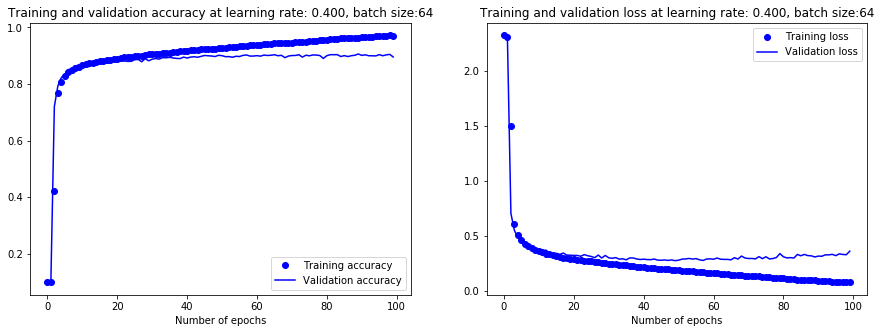

10000/10000 [==============================] - 2s 231us/step
Test loss: 0.3849374195381999
Test accuracy: 0.8905


In [394]:
#set the hyper-parameter
learning_rate = 0.4
batch_size = 64
epochs = 100

my = CNN_model()
my.setHyper_parameter(learning_rate,batch_size,epochs,'sigmoid')
my.train_model(cnn_train_X,cnn_train_label,cnn_valid_X,cnn_valid_label)
my.showGraph()
my.predict(cnn_test_X,cnn_test_Y)